# Part 3: An analysis of political alignment

In this section we will use electoral data to measure political alignment & see whatever conclusions we can receive from here. Ready? Time to do a Data science

Ill start by 'Creatively Sharing' Nat's old code

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

sns.set_theme(style="white")
sns.set(font_scale=1.2)
sns.set_palette("copper_r")
plt.rcParams["axes.labelsize"] = 12

# Absolutely diabolical method of doing relative imports with a package who shares its name with
# something in the stdlib in Jupyter Lab because it seems impossible otherwise
# __import__("sys").path.append("./code")
# from project_functions1 import *

CITIES = [
    { "name": "Atlanta", "pos": (-84.791944, -84.001944, 33.478333, 34.0375) },
    { "name": "Austin", "pos": (-98.071667, -97.371111, 30.033889, 30.569722) },
    { "name": "Boston", "pos": (-71.284444, -70.880278, 42.206389, 42.484444) },
    { "name": "Chicago", "pos": (-88.044167, -87.508333, 41.624444, 42.026389) },
    { "name": "Denver", "pos": (-105.104444, -104.625556, 39.578611, 39.920278) },
    { "name": "Houston", "pos": (-95.858333, -95.013056, 29.472778, 30.134167) },
    { "name": "Los Angeles", "pos": (-118.615556, -117.618333, 33.701111, 34.411667) },
    { "name": "Miami", "pos": (-80.2375, -80.145833, 25.734722, 25.812222) },
    { "name": "New York", "pos": (-74.459722, -73.393333, 40.355556, 41.102222) },
    { "name": "New Orleans", "pos": (-90.220833, -89.915833, 29.813056, 30.045556) },
    { "name": "Philadelphia", "pos": (-75.344167, -74.94, 39.846667, 40.146389) },
    { "name": "Portland", "pos": (-122.795278, -122.493333, 45.465556, 45.654444) },
    { "name": "San Francisco", "pos": (-122.521667, -122.352778, 37.690278, 37.812222) },
    { "name": "Seattle", "pos": (-122.473056, -122.151667, 47.493333, 47.718611) },
    { "name": "Washington DC", "pos": (-77.1125, -76.919722, 38.833333, 38.963889) },
]

# gb, pol, counties, cords = load_and_process()

In [78]:
gb = pd.read_csv("data/pre processed/gaybourhoods-nat.csv")

SS_INDEX_MAX = gb.SS_Index.max()

gb

,Unnamed: 0,SS_Index,TOTINDEX,lat,long,kinsey,percent_democrat,neighbourhood_kinsey
0,0,55.012669,67.077054,34.093828,-118.381697,6,0.456450,1.132075
1,1,58.412517,61.866815,37.758057,-122.435410,6,0.742633,2.533333
2,2,30.731192,37.908747,40.742039,-74.000620,6,0.775215,1.091667
3,3,21.995808,37.530067,40.734012,-74.006746,6,0.794248,1.101695
4,4,21.284224,35.843573,37.773134,-122.411167,5,0.742633,2.533333
...,...,...,...,...,...,...,...,...
2323,2323,0.000000,0.000000,45.528666,-122.678981,0,0.753689,1.708333
2324,2324,0.000000,0.000000,47.606211,-122.333792,0,0.545340,2.148148
2325,2325,0.000000,0.000000,47.449678,-122.307657,0,0.543670,1.357143
2326,2326,0.000000,0.000000,47.604569,-122.335359,0,0.545340,2.148148


In [79]:
pol = pd.read_csv("data/pre processed/election-2012.csv")
pol

,Unnamed: 0,county,lat,long,percent
0,0,Autauga AL,32.532237,-86.646439,0.265878
1,1,Baldwin AL,30.659218,-87.746067,0.215894
2,2,Barbour AL,31.870253,-85.405103,0.513685
3,3,Bibb AL,33.015893,-87.127148,0.261520
4,4,Blount AL,33.977357,-86.566440,0.123719
...,...,...,...,...,...
2879,2879,Sweetwater WY,41.660328,-108.875677,0.282569
2880,2880,Teton WY,44.048662,-110.426087,0.541957
2881,2881,Uinta WY,41.284726,-110.558947,0.190655
2882,2882,Washakie WY,43.878830,-107.669052,0.201318


Now lets re create Nat's plots - first set is simple so lightning round

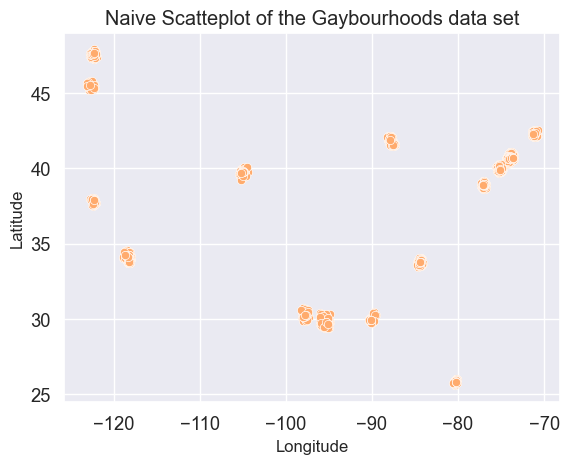

In [80]:
plot_naive_scatter1 = sns.scatterplot(data=gb, x="long", y="lat")
_ = plot_naive_scatter1.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of the Gaybourhoods data set"
)

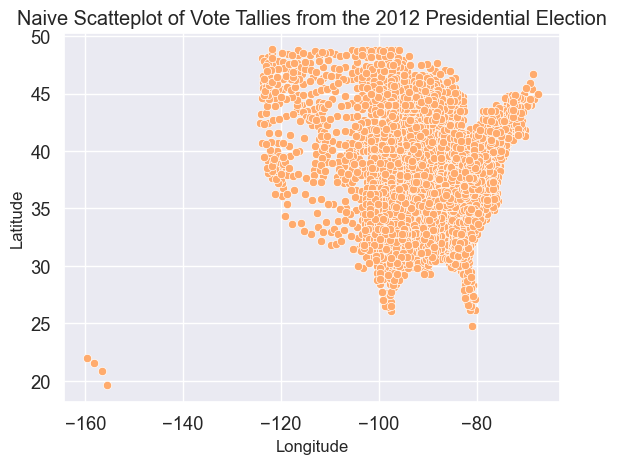

In [81]:
plot_naive_scatter2 = sns.scatterplot(data=pol, x="long", y="lat")
_ = plot_naive_scatter2.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of Vote Tallies from the 2012 Presidential Election"
)

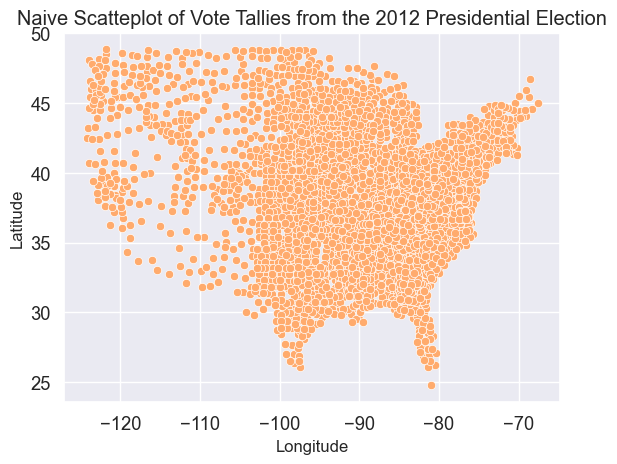

In [82]:
pol = pol[pol["long"] > -140]

plot_naive_scatter3 = sns.scatterplot(data=pol, x="long", y="lat")
_ = plot_naive_scatter3.set(
    xlabel="Longitude",
    ylabel="Latitude",
    title="Naive Scatteplot of Vote Tallies from the 2012 Presidential Election"
)

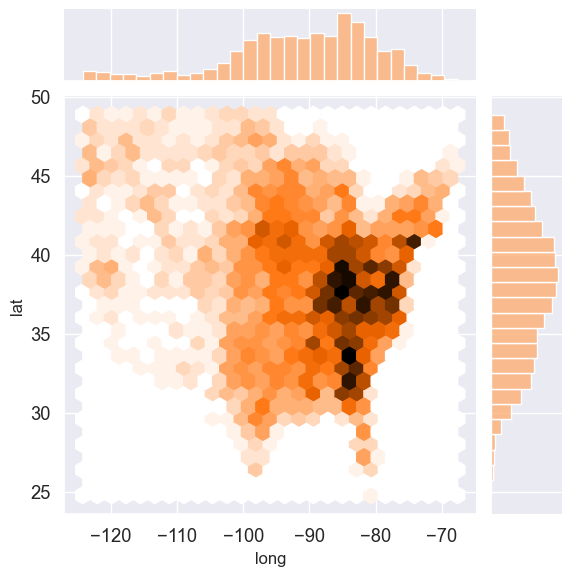

In [83]:
plot_naive_hexbin = sns.jointplot(data=pol, x="long", y="lat", kind="hex")

Looks good, good Job Nat - I have one suggestion tho

<Axes: xlabel='long', ylabel='lat'>

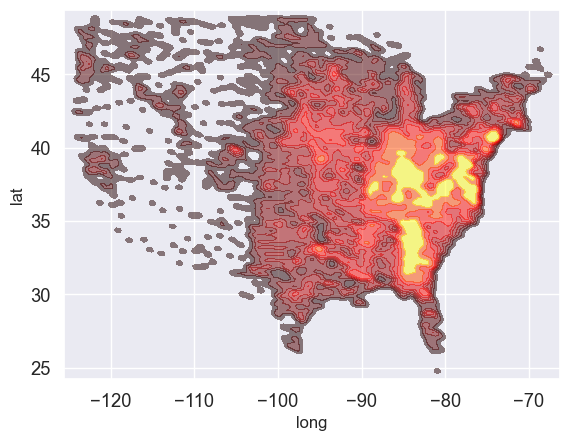

In [84]:
sns.kdeplot(data=pol, x="long", y="lat", fill=True, cmap="hot", bw_adjust=0.15, alpha=0.5)

Now the population centers we look for are a bit more obvious

Heres more of Nat's graphs:

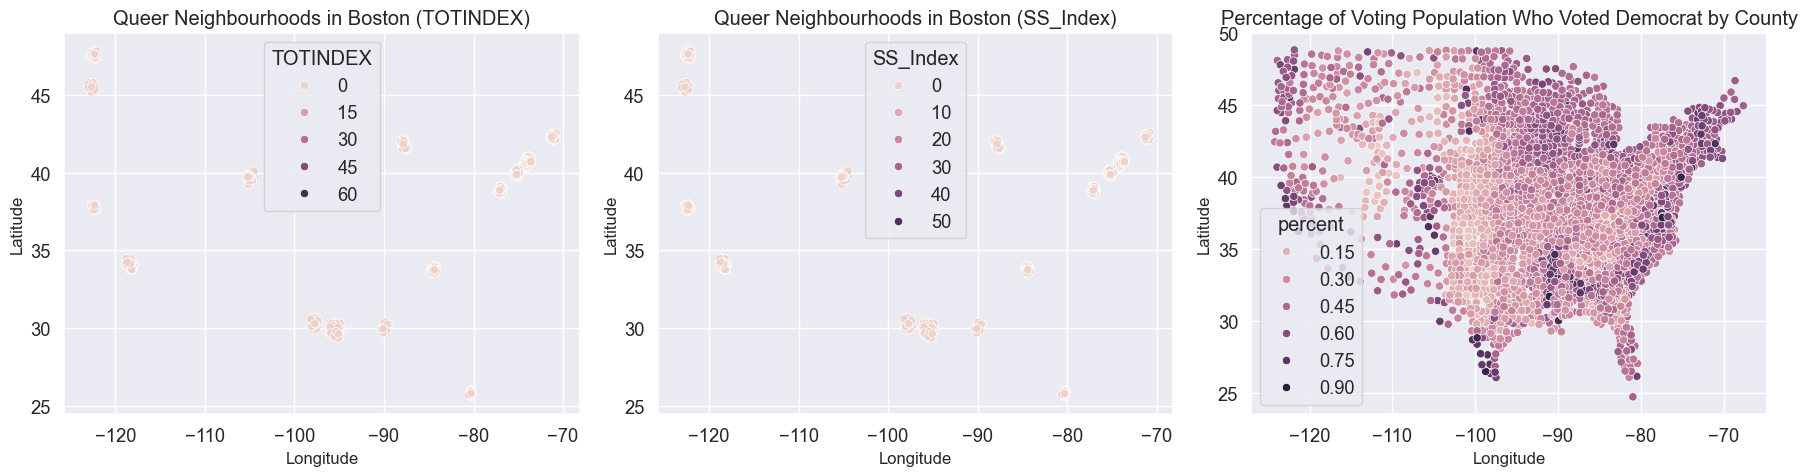

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) #messed with figure size

plot_ny_scatter1 = sns.scatterplot(ax=axes[0], data=gb, x="long", y="lat", hue="TOTINDEX")
axes[0].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (TOTINDEX)")

plot_ny_scatter2 = sns.scatterplot(ax=axes[1], data=gb, x="long", y="lat", hue="SS_Index")
axes[1].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (SS_Index)")

plot_democrat_scatter = sns.scatterplot(ax=axes[2], data=pol, x="long", y="lat", hue="percent")
axes[2].set(xlabel="Longitude", ylabel="Latitude", title="Percentage of Voting Population Who Voted Democrat by County")

plt.tight_layout(); plt.show()

At this part of the trail Nat printed one for the city of boston, so lets use our culture method from last time

In [86]:
from sklearn.cluster import KMeans

dfcity = pd.DataFrame(gb)

kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(dfcity[['lat', 'long',]])

dfcity['cluster'] = kmeans.labels_ + 1; dfcity.head(10)

names = [   'Houston', 'Boston', 'San Francisco',
            'Chicago', 'Atlanta', 'Seattle',
            'Denver', 'Philadelphia', 'Los Angeles',
            'Miami', 'New Orleans', 'New York',
            'Washington', 'Austin', 'Portland']

cluster_mapping = {i + 1: word for i, word in enumerate(names)}

dfcity['city'] = dfcity['cluster'].map(cluster_mapping)

dfcity.head(10)

C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,SS_Index,TOTINDEX,lat,long,kinsey,percent_democrat,neighbourhood_kinsey,cluster,city
0,0,55.012669,67.077054,34.093828,-118.381697,6,0.456450,1.132075,9,Los Angeles
1,1,58.412517,61.866815,37.758057,-122.435410,6,0.742633,2.533333,3,San Francisco
2,2,30.731192,37.908747,40.742039,-74.000620,6,0.775215,1.091667,12,New York
3,3,21.995808,37.530067,40.734012,-74.006746,6,0.794248,1.101695,12,New York
4,4,21.284224,35.843573,37.773134,-122.411167,5,0.742633,2.533333,3,San Francisco
5,5,20.524688,35.299180,29.967440,-90.064783,5,0.802988,0.565217,11,New Orleans
6,6,26.870973,35.141959,38.919144,-77.037381,6,0.711051,0.922078,13,Washington
7,7,25.003265,32.038585,47.611046,-122.293207,6,0.545340,1.925926,6,Seattle
8,8,17.519808,31.968980,33.799884,-84.385805,4,0.642833,1.535714,5,Atlanta
9,9,26.425592,31.293323,34.107810,-118.362247,6,0.456450,1.107143,9,Los Angeles


In [87]:
BostonDF = pd.DataFrame(dfcity.loc[dfcity['city'] == 'Boston' ]); BostonDF.head(10)

,Unnamed: 0,SS_Index,TOTINDEX,lat,long,kinsey,percent_democrat,neighbourhood_kinsey,cluster,city
26,26,11.079100,21.470289,42.350579,-71.076397,3,0.774464,1.300000,2,Boston
28,28,11.127326,20.328385,42.357768,-71.064858,3,0.774464,1.254902,2,Boston
31,31,25.862374,19.713170,42.337582,-71.070482,6,0.774464,1.250000,2,Boston
44,44,21.984843,15.757502,42.309174,-71.113835,6,0.774464,1.188679,2,Boston
68,68,15.364102,11.012126,42.284333,-71.126228,4,0.568586,1.234043,2,Boston
75,75,12.820099,10.365198,42.350518,-71.059077,3,0.774464,1.285714,2,Boston
82,82,0.000000,10.000000,42.347476,-71.082035,0,0.774464,1.264151,2,Boston
105,105,11.883894,8.517709,42.315682,-71.055555,3,0.774464,1.255319,2,Boston
112,112,6.613113,8.269320,42.347635,-71.103082,1,0.774464,1.264151,2,Boston
133,133,8.471465,7.248342,42.362986,-71.103353,2,0.774464,1.240741,2,Boston


Now lets make Nats graph again

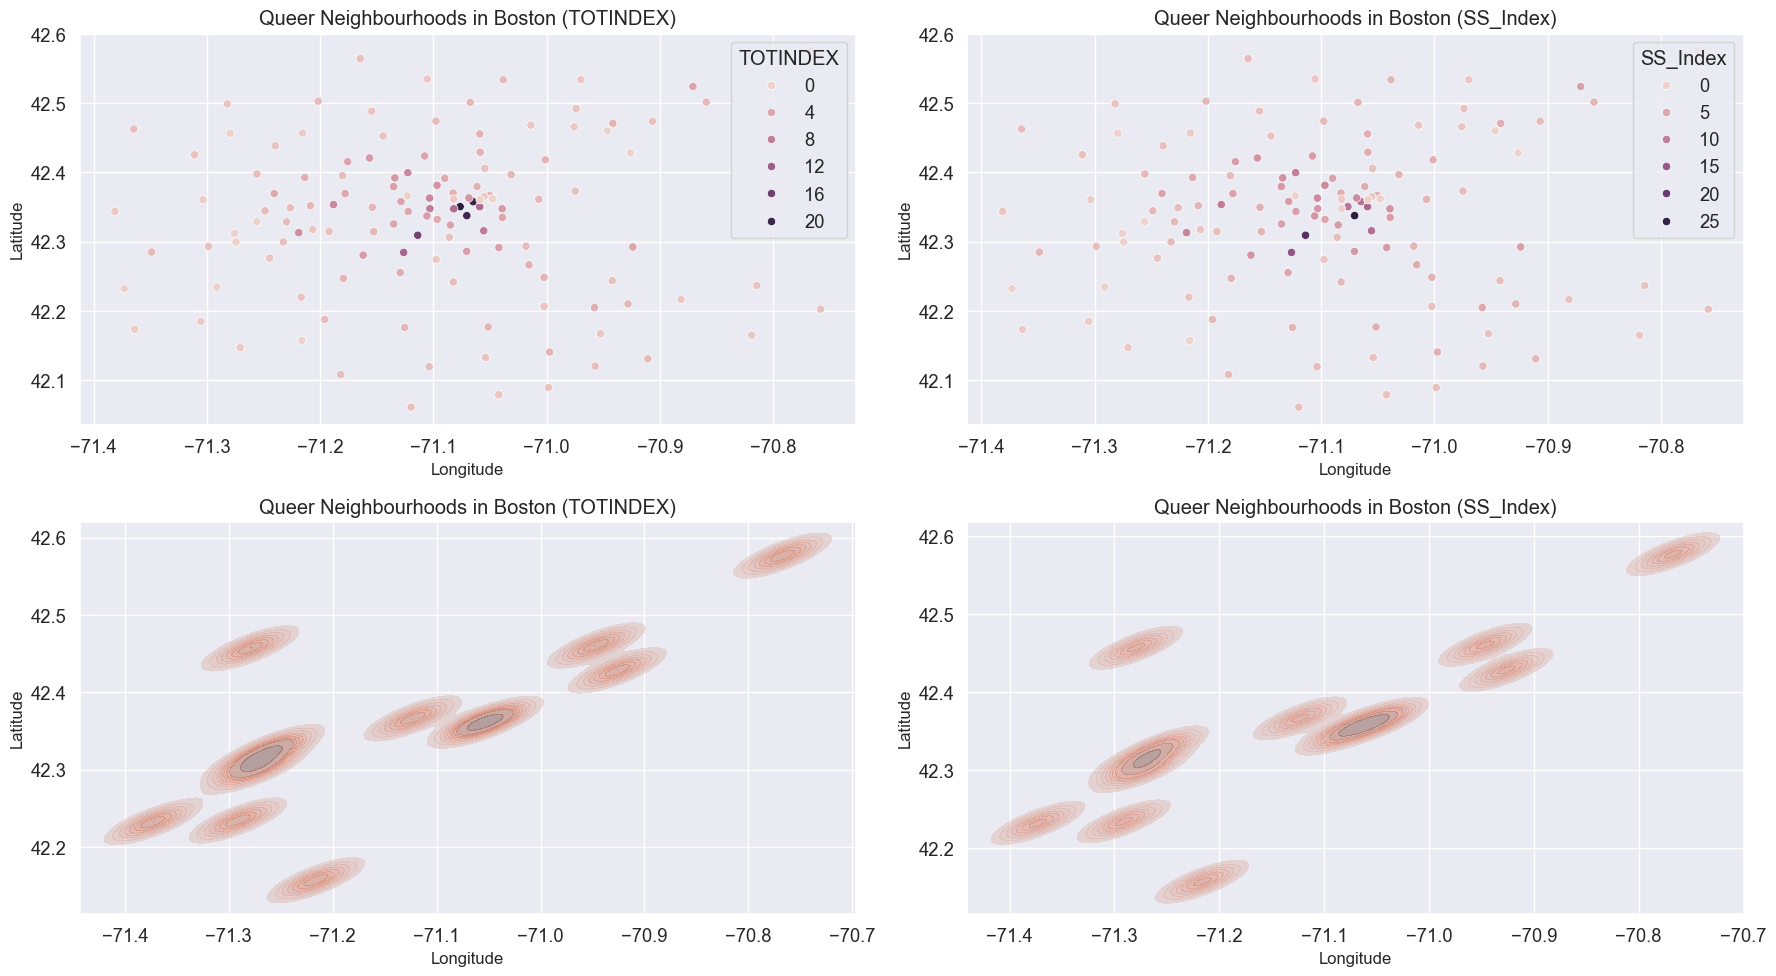

In [88]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10)) #messed with figure size

plot_ny_scatter1 = sns.scatterplot(ax=axes[0, 0], data=BostonDF, x="long", y="lat", hue="TOTINDEX")
axes[0, 0].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (TOTINDEX)")

plot_ny_scatter2 = sns.scatterplot(ax=axes[0, 1], data=BostonDF, x="long", y="lat", hue="SS_Index")
axes[0, 1].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (SS_Index)")

plot_ny_scatter21 = sns.kdeplot(ax=axes[1, 0], data=BostonDF, x="long", y="lat", hue="TOTINDEX", fill=True, thresh=.1, bw_adjust=0.2, alpha=0.5, warn_singular=False)
axes[1, 0].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (TOTINDEX)")

plot_ny_scatter22 = sns.kdeplot(ax=axes[1, 1], data=BostonDF, x="long", y="lat", hue="SS_Index", fill=True, thresh=.1, bw_adjust=0.2, alpha=0.5, warn_singular=False)
axes[1, 1].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (SS_Index)")

axes[1, 0].legend([],[], frameon=False); axes[1, 1].legend([],[], frameon=False)

plt.tight_layout(); plt.show() #fill=True, cmap="hot", bw_adjust=0.15, alpha=0.5)

Or alternatively we could also paint the city like this

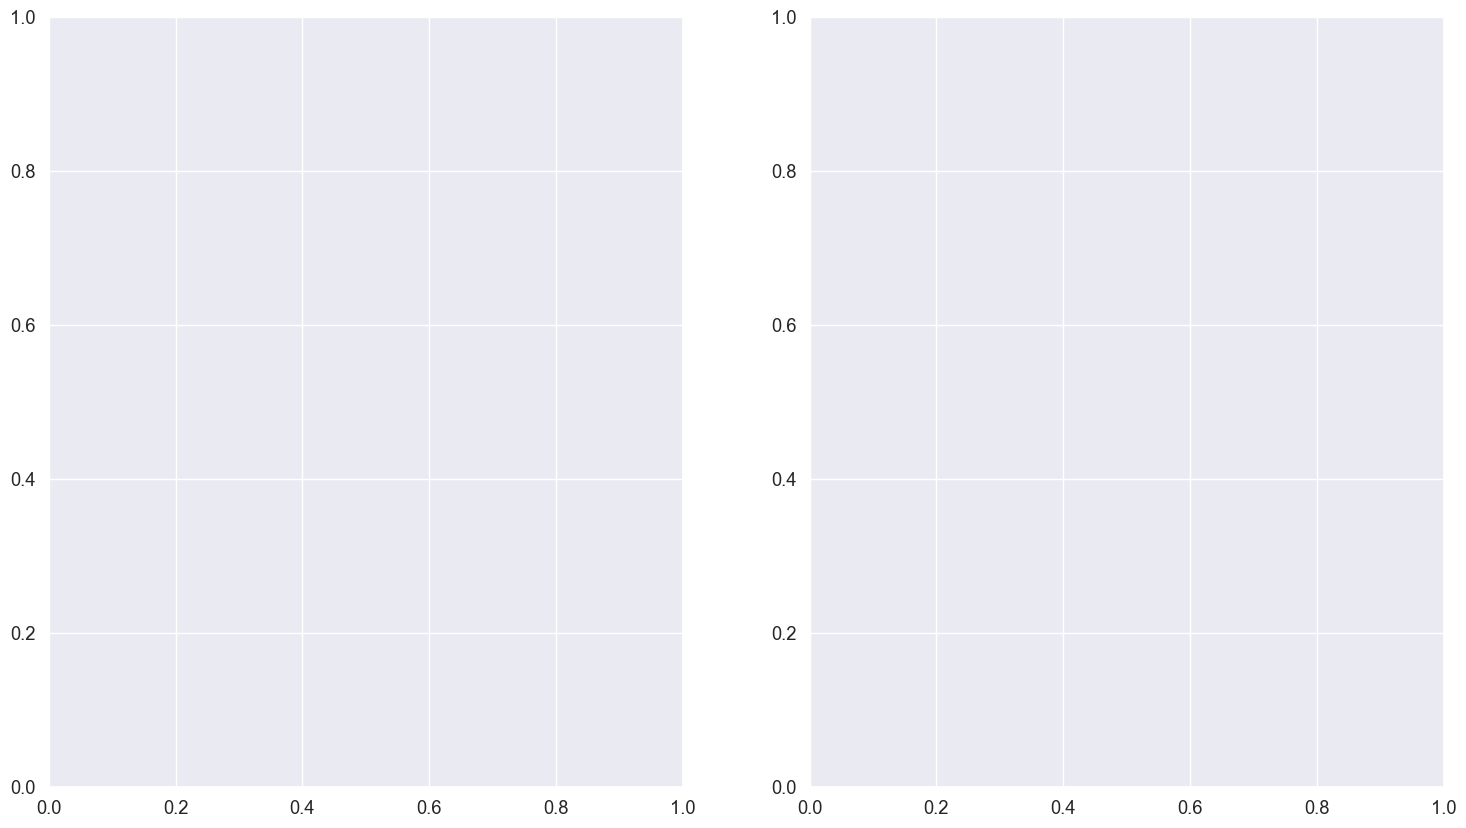

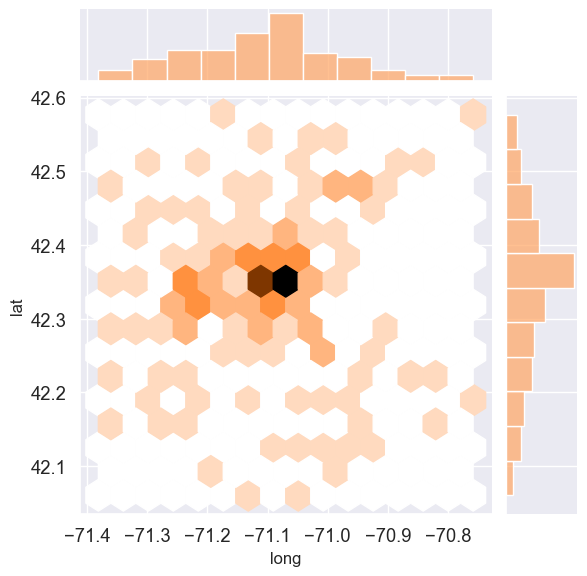

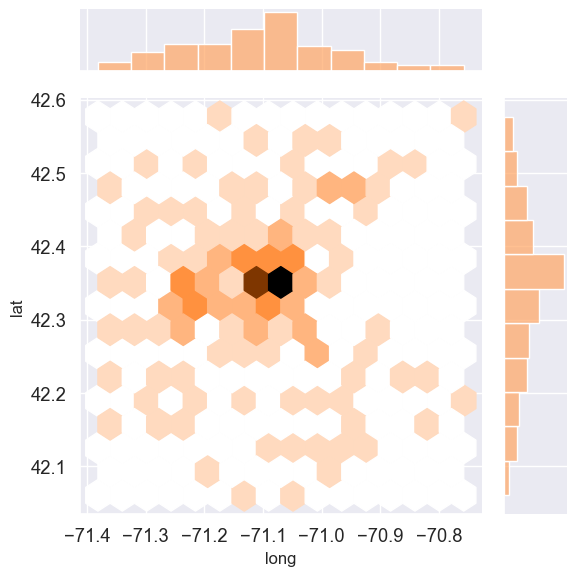

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10)) #messed with figure size

plot_ny_scatter21 = sns.jointplot(data=BostonDF, x="long", y="lat", kind="hex", joint_kws=dict(gridsize=15))
plot_ny_scatter22 = sns.jointplot(data=BostonDF, x="long", y="lat", kind="hex", joint_kws=dict(gridsize=15))

axes[0].legend([],[], frameon=False); axes[1].legend([],[], frameon=False)

plt.tight_layout(); plt.show()

What does all of this mean? Well Nat originally concluded:

    "In the above plot, we colour points darker the higher their "gaybourhood index" is. This index is a weighted composite of a few factors. The TOTINDEX boldy weighs the queerness of same-sex married couples more than unmarried same-sex households. While it's subjective, in my opinion, this marginalizes the experiences of queer people who have no desire to marry.
    
    If we wanted to look at unmarried same sex households alone, we could use the "SS_Index" column [which,] As predicted, [shows us] the diversity of the data becomes more apparent when we don't hide it. While the difference isn't extremely substantial, it will be worthwhile to continue to analyze multiple factors when exploring this data. This is especially the case when we consider the fact that the data set is already very limited in how it fails to account for gender diversity."


My current analysis inclines agreeing with the original hypothesis, however the point I disagree on is the weights of all attributes being subjective, as well as the relevance of the data failing to account for unmarried or gender diverse folks. My main disagreement stems from the simple point: the data's goal is to find geographics of queer communities, which by the looks of Boston we can boilerplate this to locate all our Gayborhoods, (see part 4)

The final Viz work over here is comparing political alignment to queer neighborhoods - & beyond that we could do some linear regressions, a CART could be used here but that would warrant its own analysis due to the lack of adequate data for such a model for inference.

So lets take a Jab at political alignment:

In [90]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 8))
# plot_ny_scatter21 = axes[0].hexbin(BostonDF['long'], BostonDF['lat'], gridsize=15, cmap='Blues')#sns.jointplot(ax=axes[0], data=BostonDF, x="long", y="lat", kind="hex", joint_kws=dict(gridsize=15))
# axes[0].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (TOTINDEX)")
# plot_ny_scatter1 = sns.scatterplot(ax=axes[1], data=BostonDF, x="long", y="lat", hue="TOTINDEX")
# axes[1].set(xlabel="Longitude", ylabel="Latitude", title="Queer Neighbourhoods in Boston (TOTINDEX)")
# plt.tight_layout(); plt.show()

# from matplotlib.colors import ListedColormap

# def add_white_to_cmap(cmap_name):
#     cmap = plt.get_cmap(cmap_name)
#     colors = cmap(np.arange(cmap.N))
#     colors[0] = [1, 1, 1, 1]  # Set the first color to white
#     new_cmap = ListedColormap(colors)
#     return new_cmap

# cmap_with_white = add_white_to_cmap('Reds')
# cmap_with_white = add_white_to_cmap('Greens')
# cmap_with_white = add_white_to_cmap('Blues')

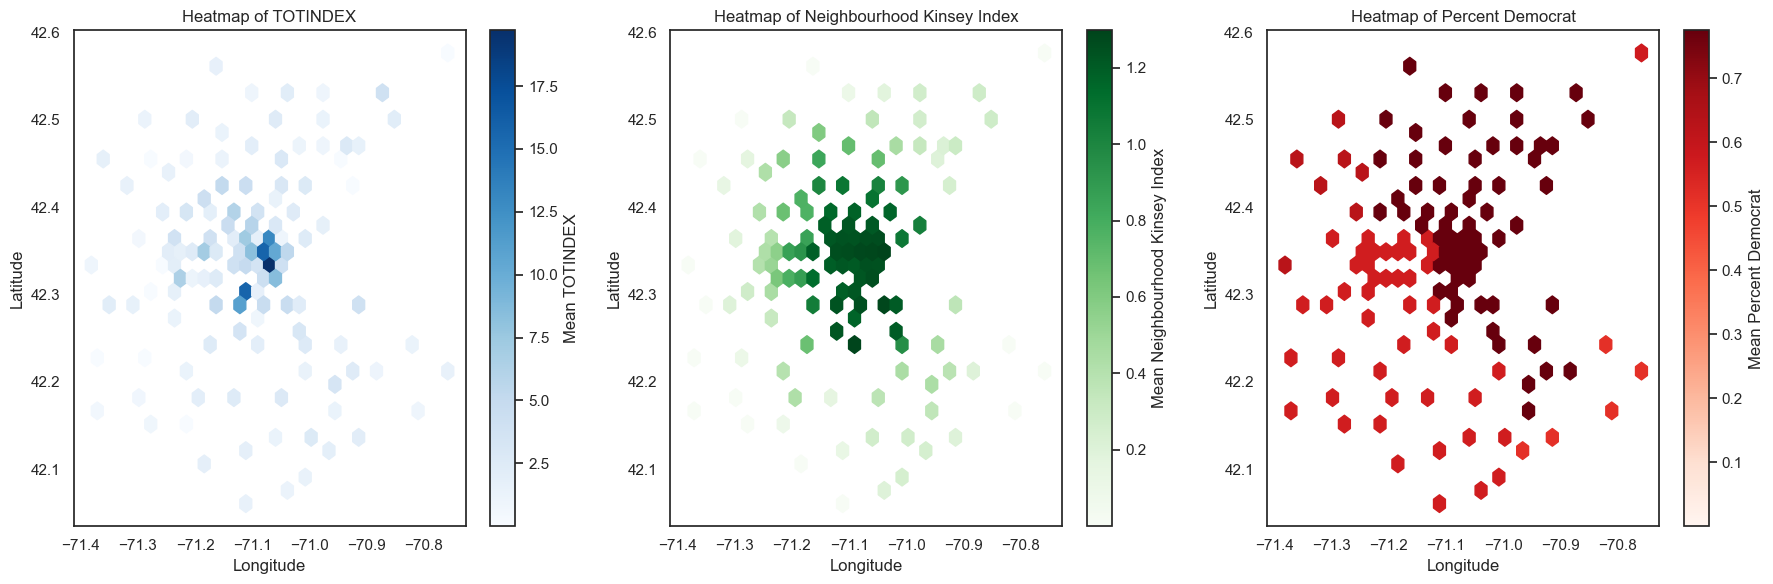

In [94]:
sns.set_theme(style="white")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# TOTINDEX
hb1 = axes[0].hexbin(BostonDF['long'], BostonDF['lat'], C=BostonDF['TOTINDEX'], gridsize=30, cmap='Blues', reduce_C_function=np.mean, mincnt=1, vmin=1e-6)
axes[0].set(xlabel="Longitude", ylabel="Latitude", title="Heatmap of TOTINDEX")
fig.colorbar(hb1, ax=axes[0], label='Mean TOTINDEX')

# neighbourhood_kinsey
hb2 = axes[1].hexbin(BostonDF['long'], BostonDF['lat'], C=BostonDF['neighbourhood_kinsey'], gridsize=30, cmap='Greens', reduce_C_function=np.mean, mincnt=1, vmin=1e-6)
axes[1].set(xlabel="Longitude", ylabel="Latitude", title="Heatmap of Neighbourhood Kinsey Index")
fig.colorbar(hb2, ax=axes[1], label='Mean Neighbourhood Kinsey Index')

# percent_democrat
hb3 = axes[2].hexbin(BostonDF['long'], BostonDF['lat'], C=BostonDF['percent_democrat'], gridsize=30, cmap='Reds', reduce_C_function=np.mean, mincnt=1, vmin=1e-6)
axes[2].set(xlabel="Longitude", ylabel="Latitude", title="Heatmap of Percent Democrat")
fig.colorbar(hb3, ax=axes[2], label='Mean Percent Democrat')


plt.tight_layout(); plt.show()

Lets do it bigger again

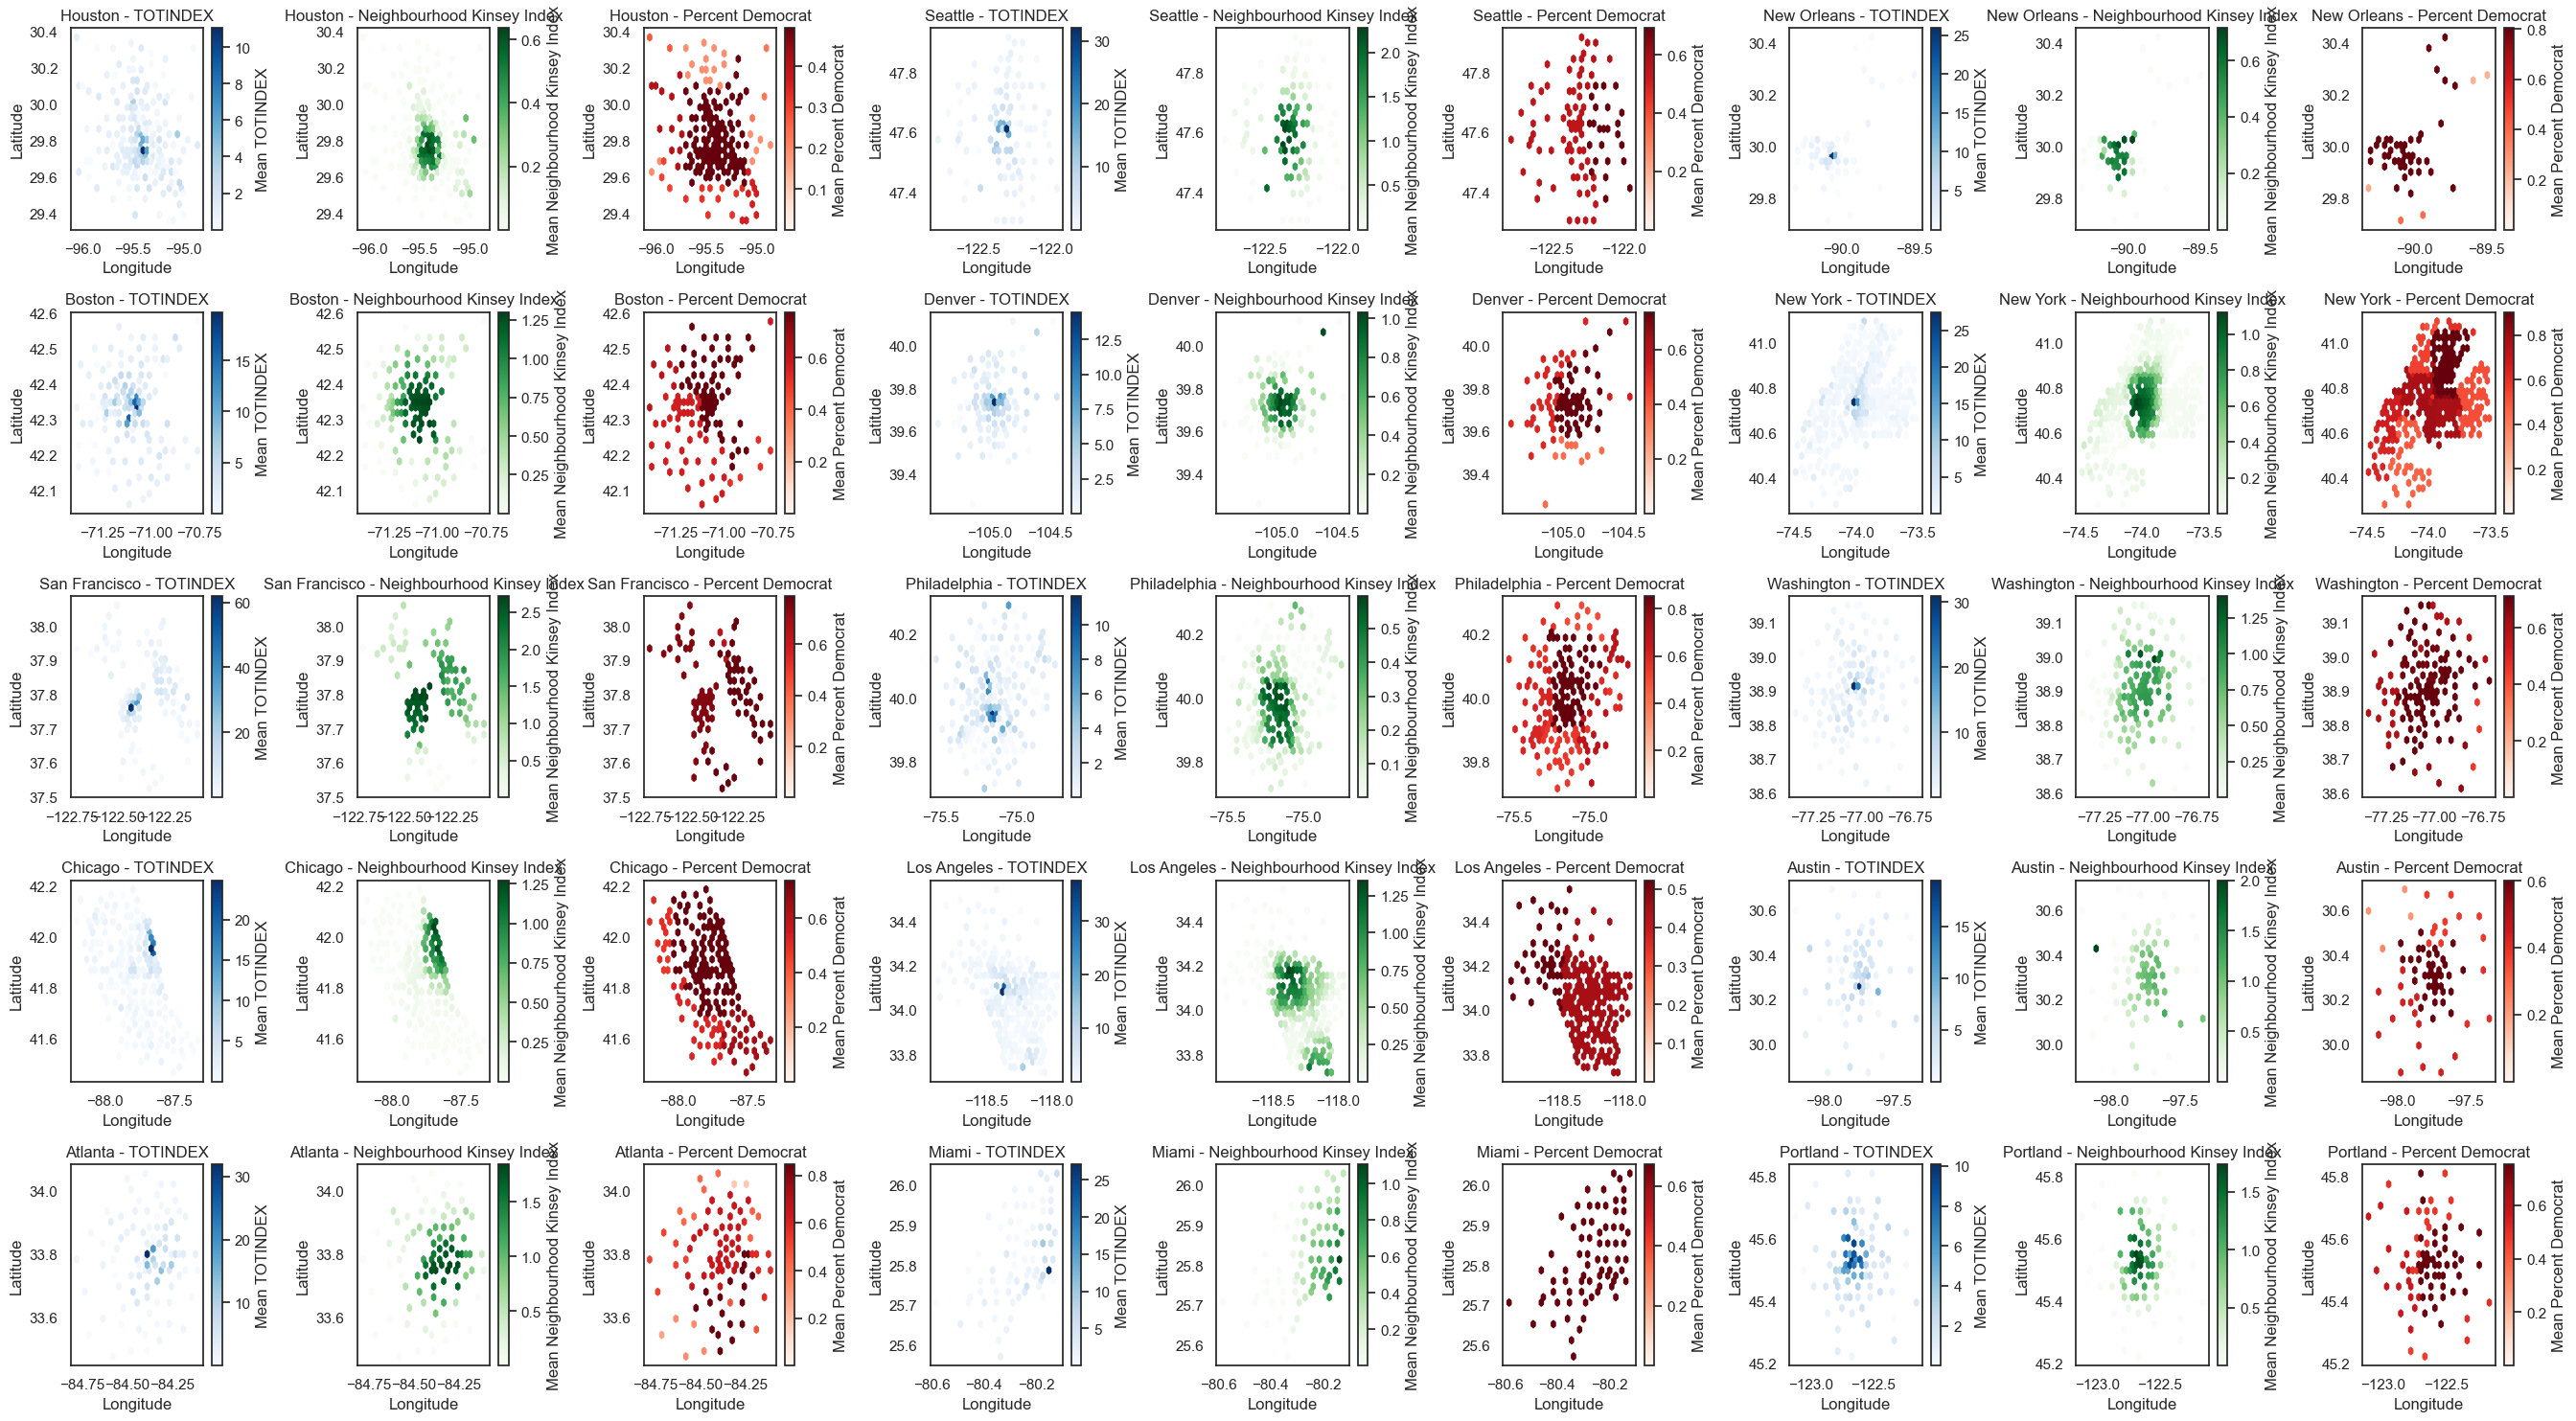

In [105]:
names = ['Houston', 'Boston', 'San Francisco', 'Chicago', 'Atlanta', 'Seattle', 'Denver', 'Philadelphia',
        'Los Angeles', 'Miami', 'New Orleans', 'New York', 'Washington', 'Austin', 'Portland']

fig, axes = plt.subplots(5, 9, figsize=(27, 15))  # Adjust the size to fit all cities

for i, city in enumerate(names):
    cityDF = pd.DataFrame(dfcity.loc[dfcity['city'] == city])  # Filter the DataFrame for the city
    row = i // 5 * 3; col = i % 5

    # TOTINDEX
    hb1 = axes[col, row].hexbin(cityDF['long'], cityDF['lat'], C=cityDF['TOTINDEX'], gridsize=30, cmap='Blues',
                                reduce_C_function=np.mean, mincnt=1, vmin=1e-6)
    axes[col, row].set(xlabel="Longitude", ylabel="Latitude", title=f"{city} - TOTINDEX")
    fig.colorbar(hb1, ax=axes[col, row], label='Mean TOTINDEX')

    # Neighbourhood Kinsey
    hb2 = axes[col, row + 1].hexbin(cityDF['long'], cityDF['lat'], C=cityDF['neighbourhood_kinsey'], gridsize=30, cmap='Greens',
                                    reduce_C_function=np.mean, mincnt=1, vmin=1e-6)
    axes[col, row + 1].set(xlabel="Longitude", ylabel="Latitude", title=f"{city} - Neighbourhood Kinsey Index")
    fig.colorbar(hb2, ax=axes[col, row + 1], label='Mean Neighbourhood Kinsey Index')

    # Percent Democrat
    hb3 = axes[col, row + 2].hexbin(cityDF['long'], cityDF['lat'], C=cityDF['percent_democrat'], gridsize=30, cmap='Reds',
                                    reduce_C_function=np.mean, mincnt=1, vmin=1e-6)
    axes[col, row + 2].set(xlabel="Longitude", ylabel="Latitude", title=f"{city} - Percent Democrat")
    fig.colorbar(hb3, ax=axes[col, row + 2], label='Mean Percent Democrat')

plt.tight_layout(); plt.show()